<img width=15% src='https://drive.google.com/uc?export=view&id=12lBq2t3d2iPzN2EsbLGnvu-vo_WTl-sR'>    

## <center>Kuliah Intelijensi Buatan</center>

### <center>Materi : Percobaan ANN Pada dataset Hepatitis C </center> 
##### <center>Library : sklearn Multi-layer Perceptron Classifier (MLPClassifier) dan tensorflow.keras</center> 

---

# 1. Percobaan sklearn Multi-layer Perceptron Classifier (MLPClassifier)

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


In [3]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [5]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 1.0


In [6]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 1.0


Akurasi Testing ANN: 1.0


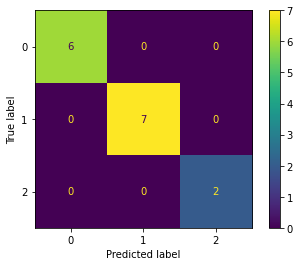

In [7]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

# 2. Percobaan tensorflow.keras

In [8]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [13]:
model.fit(X_train,Y_train,epochs=100,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0989 - acc: 0.9561 - val_loss: 0.0820 - val_acc: 1.0000
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0899 - acc: 0.9649 - val_loss: 0.0510 - val_acc: 1.0000
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0912 - acc: 0.9649 - val_loss: 0.0539 - val_acc: 1.0000
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0884 - acc: 0.9737 - val_loss: 0.0665 - val_acc: 1.0000
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0895 - acc: 0.9649 - val_loss: 0.0767 - val_acc: 1.0000
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0859 - acc: 0.9737 - val_loss: 0.0439 - val_acc: 1.0000
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0894 - acc: 0.9737 - val_loss: 0.0671 - val_acc: 1.0000
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0973 - 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)


1/1 [==============================] - 0s 31ms/step - loss: 0.0276 - acc: 1.0000
Akurasi Testing ANN: 1.0


---

# <font color=red>TUGAS :</font>
Implementasi metode Artificial Neural Network (ANN) pada permasalahan klasifikasi

- Download dataset Hepatitis C pada link berikut https://archive.ics.uci.edu/ml/datasets/HCV+data
- Membagi dataset menjadi 3 bagian yaitu data train, data validasi, dan data uji
- Merancang dan membangun model ANN
- Lakukan tuning parameter agar menghasilkan model yang terbaik
- Menampilkan grafik loss train dan validasi dari hasil pembangunan model


## <center>Implementasi metode Artificial Neural Network (ANN) untuk klasifikasi pada Dataset Hepatitis C</center>
<img width=15% src='https://drive.google.com/uc?export=view&id=12lBq2t3d2iPzN2EsbLGnvu-vo_WTl-sR'>    

### <center><br> Disusun Oleh : <br> Daniel Morantha <br> (2019230088) </center>

### <center>PROGRAM STUDI TEKNOLOGI INFORMASI <br>  FAKULTAS TEKNIK <br>  UNIVERSITAS DARMA PERSADA <br> 2022</center>

#### Pendahuluan

<p align="justify">Pada projek ini, kita menggunakan Scikit-Learn, Keras, TensorFlow, NumPy, Pandas, Seaborn dan libraries lainnya untuk klasifikasi dataset Hepatitis melaui UCI  Machine Learning Repository. <br> </p>

<p align="justify"> The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data. </p> <br>

<p align="justify"> projek ini menggunakan model MLP Classifier, AdaBoostClassifier distribution of features, feature importance, cross validation score, and predicted values versus true values, confusion matrix, learning curve, performace of the model, scalability of the model, training loss, and training accuracy. </p> <br>

### 1. Import pustaka yg dibtuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 2. Lihat isi dataset Hepatitis C

In [2]:
df = pd.read_csv("hcvdat0.csv")

print(df.iloc[:,0:7].head().to_string())
print(df.iloc[:,7:14].head().to_string())

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT
0           1  0=Blood Donor   32   m  38.5  52.5   7.7
1           2  0=Blood Donor   32   m  38.5  70.3  18.0
2           3  0=Blood Donor   32   m  46.9  74.7  36.2
3           4  0=Blood Donor   32   m  43.2  52.0  30.6
4           5  0=Blood Donor   32   m  39.2  74.1  32.6
    AST   BIL    CHE  CHOL   CREA   GGT  PROT
0  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4  24.8   9.6   9.15  4.32   76.0  29.9  68.7


### 3. Cek jumlah baris dan kolom

In [3]:
print("dimensi dari data", df.shape)

dimensi dari data (615, 14)


### 4. Drop unnamed: 0 column

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
#Cek Tipe data masing2 kolom
print(df.dtypes)

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


### 5. Cek nilai null dalam dataset

In [6]:
print(df.isnull().sum())
print("Total", df.isnull().sum().sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Total 31


### 6. Isi Nilai kosong dengan rata-rata

In [7]:
df.fillna(df.median(), inplace=True)

print(df.isnull().sum())
print("Total: ", df.isnull().sum().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64
Total:  0


### 7. Plot umur histrogram

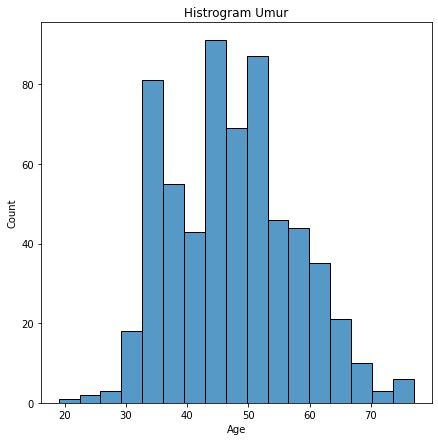

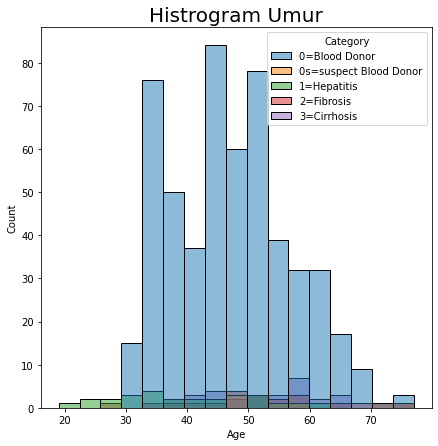

In [8]:
plt.figure(figsize=(7,7))
plt.title("Histrogram Umur")
sns.histplot(df['Age'])
plt.show()
plt.figure(figsize=(7,7))
plt.title("Histrogram Umur", fontsize=20)
sns.histplot(df[['Age', 'Category']], x='Age', hue='Category')
plt.show()

### 8. Plot sebaran kolom sex

m    377
f    238
Name: Sex, dtype: int64


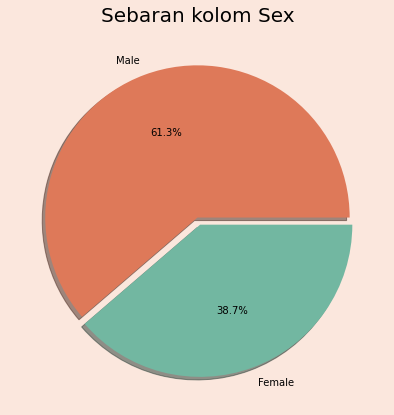

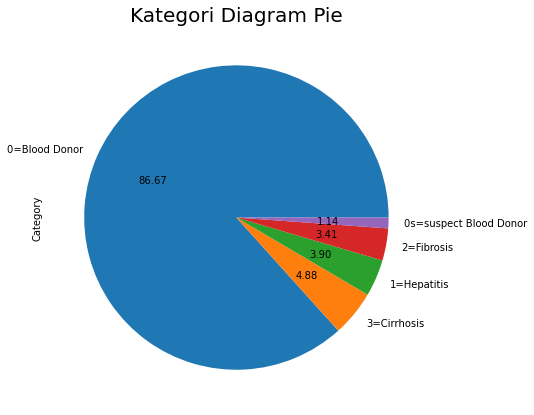

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


In [9]:
print(df.Sex.value_counts())

fig, ax = plt.subplots(figsize=(7,7), facecolor='#fbe7dd')
plt.pie(x=df["Sex"].value_counts(),
        colors = ['#de7959', '#72b7a1'],
        labels = ["Male", "Female"],
        shadow = True,
        explode = (0, 0.05),
        autopct = '%1.1f%%'
        )

plt.title("Sebaran kolom Sex", fontsize=20)
plt.show()

print()

plt.figure(figsize=(7,7))
df['Category'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Kategori Diagram Pie', fontsize=20)
plt.show()
print(df['Category'].value_counts())

#### Dari sini kita bisa melihat bahwa dataset terjadi ketidakseimbangan. Kita perlu lebih sampel dataset dengan menggunakan SMOTE method

### 9. Preprosesing

In [10]:
#### cari nilai unik di kolom kategori dan sex dan menempatkan kolom tersebut


df.Category.unique()
df.Sex.unique()

#Menempatkan kolom masuk ke nilai numerik
df['Category'] = df['Category'].map({'0=Blood Donor': 0, \
                                    '0s=suspect Blood Donor':1, "1=Hepatitis": 2, \
                                     "2=Fibrosis": 3, "3=Cirrhosis":4
                                    })
df['Sex'] = df['Sex'].map({'m':1, 'f':2})
print(df.iloc[:,0:7].head().to_string())
print(df.iloc[:,7:14].head().to_string())

print()

print(df.dtypes)


   Category  Age  Sex   ALB   ALP   ALT   AST
0         0   32    1  38.5  52.5   7.7  22.1
1         0   32    1  38.5  70.3  18.0  24.7
2         0   32    1  46.9  74.7  36.2  52.6
3         0   32    1  43.2  52.0  30.6  22.6
4         0   32    1  39.2  74.1  32.6  24.8
    BIL    CHE  CHOL   CREA   GGT  PROT
0   7.5   6.93  3.23  106.0  12.1  69.0
1   3.9  11.17  4.80   74.0  15.6  76.5
2   6.1   8.84  5.20   86.0  33.2  79.3
3  18.9   7.33  4.74   80.0  33.8  75.7
4   9.6   9.15  4.32   76.0  29.9  68.7

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


#### Sampel data menggunakan metode SMOTE

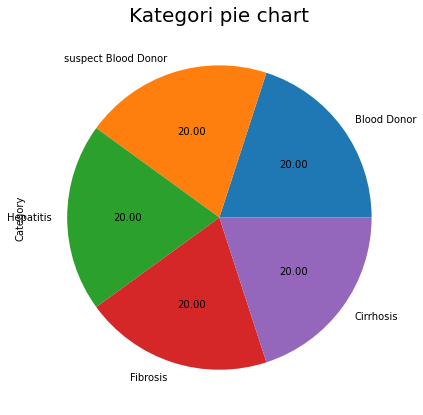

0    533
2    533
4    533
1    533
3    533
Name: Category, dtype: int64

In [11]:

x, y = df.drop('Category', axis=1), df['Category']
smote = SMOTE()
x, y = smote.fit_resample(x,y)
plt.figure(figsize=(7,7))
y.value_counts().plot(kind='pie', labels=["Blood Donor", \
                                          "suspect Blood Donor", "Hepatitis", "Fibrosis", "Cirrhosis"], \
                                          autopct='%.2f')
plt.title('Kategori pie chart', fontsize=20)
plt.show()
y.value_counts()

In [12]:
# Skala fitur dengan MinMaxScaler

cols_to_scale = x.drop('Sex', axis=1).columns
cols_to_scale
scale = MinMaxScaler()
scalled = scale.fit_transform(x[cols_to_scale])

i = 0
for col in cols_to_scale:
  x[col] = scalled[:,i]
  i += 1

print(x.head())

        Age  Sex       ALB       ALP       ALT       AST       BIL       CHE  \
0  0.224138    1  0.350669  0.101653  0.020962  0.036694  0.026461  0.367578   
1  0.224138    1  0.350669  0.145571  0.052713  0.044990  0.012243  0.650434   
2  0.224138    1  0.475483  0.156427  0.108816  0.134014  0.020932  0.494997   
3  0.224138    1  0.420505  0.100419  0.091554  0.038290  0.071485  0.394263   
4  0.224138    1  0.361070  0.154947  0.097719  0.045310  0.034755  0.515677   

       CHOL      CREA       GGT      PROT  
0  0.218447  0.091495  0.011757  0.535398  
1  0.408981  0.061619  0.017172  0.701327  
2  0.457524  0.072822  0.044400  0.763274  
3  0.401699  0.067221  0.045328  0.683628  
4  0.350728  0.063486  0.039295  0.528761  


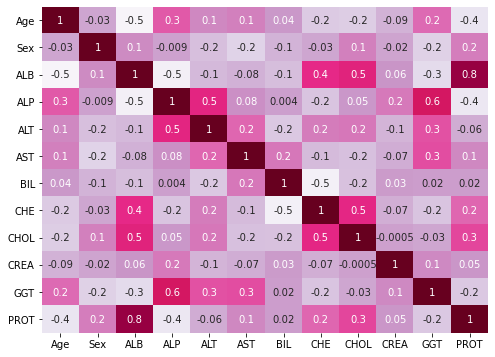

In [13]:
from IPython.core.pylabtools import figsize
# Plot korelasi 

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(x.corr(), annot=True, fmt='.1g', \
            cmap="PuRd", cbar=False);

### 8. Seleksi kolom yang penting

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


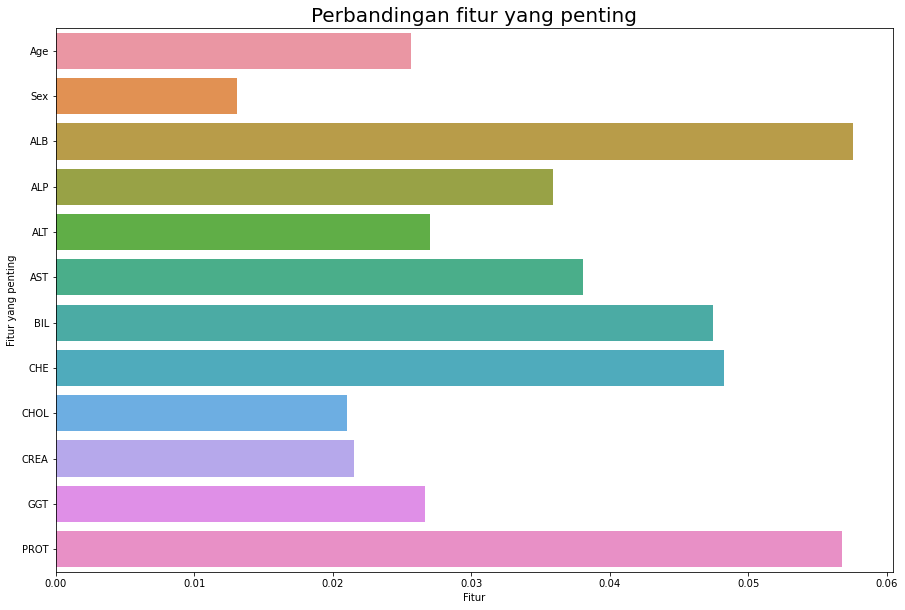

In [16]:
r = ExtraTreesClassifier(random_state=0)
r.fit(x, y)
feature_importance = r.feature_importances_

feature_importance_normalized = np.std(
    [tree.feature_importances_ for tree in r.estimators_],
    axis = 0)

plt.figure(figsize=(15,10))
sns.barplot(feature_importance_normalized, x.columns)
plt.xlabel('Fitur')
plt.ylabel('Fitur yang penting')
plt.title('Perbandingan fitur yang penting', fontsize=20)
plt.show()


In [17]:
feat_boundary = ['PROT', 'CHE']
X_feature = x[feat_boundary]

# X_train_feat, X_test_feat, y_train_feat, y_test_feat = train-test_split(X_feature, y, test_size=0.2, random_state = 2021, stratify=y)

X_train, X_test, Y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state = 2021, stratify=y)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)




In [18]:
import sys
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_job=None, train_sizes=np.linspace(.1, 1.0, 5)):
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20,5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Example training")
        axes[0].set_ylabel("Skor")

        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_score_std = np.std(train_scores, axis=1)

        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        axes[0].grid()
        axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="g")
        axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training skor")
        axes[0].plot(train_sizes, train_scores_mean, 'o-', color="g", label="Cross-validation score")
        axes[0].legend(loc="best")

        axes[1].grid()
        axes[1].plot(train_sizes, fit_times_mean, 'o-')
        axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
        axes[1].set_xlabel("Training Example")
        axes[1].set_ylabel("Skor")
        axes[1].set_title("Skala model")

        axes[2].grid()
        axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
        axes[2].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
        axes[2].set_xlabel("fit_times")
        axes[2].set_ylabel("Skor")
        axes[2].set_title("Performa dari model")

        return plt


In [19]:
def plot_real_pred_val(Y_test, ypred, name):
  plt.figure()
  acc = accuracy_score(Y_test,ypred)
  plt.scatter(range(len(ypred)), ypred, color="blue", lw=5, label="Predicted")
  plt.scatter(renge(len(Y_test)), Y_test,color="red", label="Actual")
  plt.title("Terprediksi nilai vs nilai benar" +name, fontsize=10)
  plt.xlabel("Akurasi" +str(round((acc*100),3)) + "%")
  plt.legend()
  plt.grid(True, alpha=0.75, lw=1, ls='-.')
  plt.show()

def plot_cm(Y_test, ypred, name):
  plt.figure()
  labels = ['0=Blood Donor', '0s+suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
  cm = confusion_matrix(Y_test, ypred)
  sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', cmap="Reds",xticklabels=labels, yticklabels=labels)

  plt.title(name + 'confusion matrix')
  plt.xlabel('Y prediksi')
  plt.ylabel('Y test')
  plt.show()
  return cm


def plot_decision_boundary(model, xtest, ytest, name):
  model.fit(xtest,ytest)
  plt.figure()

  plot_decision_region(xtest.values, ytest.ravel(), clf=model, legend=2)
  plt.title("Decision boundry for" +name+ " (Test) ")
  plt.xlabel("PROT")
  plt.ylabel("CHE")
  plt.show()



def train_model(model, X, y):
  model.fit(X, y)
  return model



def predict_model(model, X, proba=False):
  if ~proba:
    y_pred = model.predict(X)
  else:
    y_pred_proba = model.predict_proba(X)
    y_pred = np.argmax(y_pred_proba, axis=1)

    return y_pred

list_scores = []


def run_model(name, model, X_train, X_test, y_train, y_test, fc, proba=False):
  print(name)
  print(fc)

  model = train_model(model, X_train, y_train)
  y_pred = predict_model(model, X_test, proba)

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print("Akurasi: ", accuracy)
  print('Recall: ', recall)
  print('precision: ', precision)
  print('f1: ', f1)
  print(classification(y_test, y_pred))

  plot_cm(y_test, y_pred, name)
  plot_real_pred_val(y_test, y_pred, name)
  plot_decision_boundary(model, name, X_test_feat, y_test_feat, name)
  plot_learning_curve(model, name, X_train, y_train, cv=3);
  plt.show()
  list_scores.append({'Nama Model': name, 'Feature Scaling':fc, 'Accuracy': accuracy, 'recall':recall, 'Precision': precision, 'F1':f1})


  

### 9. model MLP classifier dan AdaBoostClassifier

In [20]:
mlp = MLPClassifier(random_state=20)
mlp.fit(X_train, Y_train)
mlp.score(X_test, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6472795497185742

In [21]:
model_ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
model_ada.fit(X_train, Y_train)
model_ada.score(X_test, y_test)

0.4540337711069418

### 10. Implementasi klasifikasi Hepatitis C dengan ANN

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(12,input_shape=(12,),activation='relu'))
model.add(Dense(5,activation='softmax'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(12, input_shape=(12,), activation='relu')
#     tf.keras.layers.Dense(5, activation='softmax')
# ])


model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'

)

model.fit(X_train,Y_train,batch_size=32,validation_split=0.20, epochs=200, shuffle=True)



Epoch 1/200
54/54 [==============================] - 1s 4ms/step - loss: 1.6171 - accuracy: 0.2129 - val_loss: 1.6045 - val_accuracy: 0.2412
Epoch 2/200
54/54 [==============================] - 0s 2ms/step - loss: 1.5777 - accuracy: 0.2804 - val_loss: 1.5741 - val_accuracy: 0.2998
Epoch 3/200
54/54 [==============================] - 0s 1ms/step - loss: 1.5489 - accuracy: 0.3255 - val_loss: 1.5497 - val_accuracy: 0.3162
Epoch 4/200
54/54 [==============================] - 0s 2ms/step - loss: 1.5230 - accuracy: 0.3449 - val_loss: 1.5254 - val_accuracy: 0.3396
Epoch 5/200
54/54 [==============================] - 0s 2ms/step - loss: 1.4964 - accuracy: 0.3584 - val_loss: 1.4998 - val_accuracy: 0.3443
Epoch 6/200
54/54 [==============================] - 0s 2ms/step - loss: 1.4693 - accuracy: 0.3965 - val_loss: 1.4735 - val_accuracy: 0.3794
Epoch 7/200
54/54 [==============================] - 0s 2ms/step - loss: 1.4412 - accuracy: 0.4422 - val_loss: 1.4467 - val_accuracy: 0.4239
Epoch 8/200
5

Epoch 59/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8650 - accuracy: 0.6434 - val_loss: 0.8814 - val_accuracy: 0.6230
Epoch 60/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8627 - accuracy: 0.6487 - val_loss: 0.8818 - val_accuracy: 0.6183
Epoch 61/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8614 - accuracy: 0.6446 - val_loss: 0.8805 - val_accuracy: 0.6136
Epoch 62/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8602 - accuracy: 0.6457 - val_loss: 0.8781 - val_accuracy: 0.6183
Epoch 63/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8591 - accuracy: 0.6446 - val_loss: 0.8772 - val_accuracy: 0.6230
Epoch 64/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8580 - accuracy: 0.6446 - val_loss: 0.8755 - val_accuracy: 0.6183
Epoch 65/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8566 - accuracy: 0.6446 - val_loss: 0.8751 - val_accuracy: 0.6230
Epoch 

54/54 [==============================] - 0s 1ms/step - loss: 0.8188 - accuracy: 0.6411 - val_loss: 0.8432 - val_accuracy: 0.6136
Epoch 174/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8187 - accuracy: 0.6434 - val_loss: 0.8416 - val_accuracy: 0.6206
Epoch 175/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8187 - accuracy: 0.6416 - val_loss: 0.8435 - val_accuracy: 0.6136
Epoch 176/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8188 - accuracy: 0.6387 - val_loss: 0.8425 - val_accuracy: 0.6183
Epoch 177/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8186 - accuracy: 0.6434 - val_loss: 0.8421 - val_accuracy: 0.6206
Epoch 178/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8182 - accuracy: 0.6393 - val_loss: 0.8418 - val_accuracy: 0.6230
Epoch 179/200
54/54 [==============================] - 0s 1ms/step - loss: 0.8187 - accuracy: 0.6393 - val_loss: 0.8442 - val_accuracy: 0.6206
Epoch 180/200

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 5)                 65        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [24]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, y_test)
print('Akurasi Testing ANN:', accuracy)


17/17 [==============================] - 0s 997us/step - loss: 0.8099 - accuracy: 0.6341
Akurasi Testing ANN: 0.6341463327407837


### <center> Terima Kasih </center>